<a href="https://colab.research.google.com/github/MariamKhan98/mariamkhan98/blob/main/SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
c_names = ['post1', 'post2', 'post3', 'post4']
words = ['ice', 'snow', 'tahoe', 'ghost', 'puck']
post_words = pd.DataFrame([[4,4,6,3],
                           [6,1,0,5],
                           [3,0,0,5],
                           [0,6,5,1],
                           [0,4,5,0]], index=words, columns=c_names)
post_words.index.names = ['word:']
post_words

,post1,post2,post3,post4
word:,,,,
ice,4,4,6,3
snow,6,1,0,5
tahoe,3,0,0,5
ghost,0,6,5,1
puck,0,4,5,0


In [3]:
import numpy  as np
U, sigma, V = np.linalg.svd(post_words)
print(np.round(V, decimals=2))

[[-0.4  -0.55 -0.61 -0.4 ]
 [-0.58  0.37  0.44 -0.58]
 [ 0.56 -0.46  0.41 -0.55]
 [-0.42 -0.59  0.52  0.45]]


In [4]:
sigma

array([13.55940373,  9.25515187,  2.06889804,  1.48472053])

In [5]:
A_approx = np.matrix(U[:, :2]) * np.diag(sigma[:2]) * np.matrix(V[:2, :])
print(pd.DataFrame(A_approx, index=words, columns=c_names))

          post1     post2     post3     post4
ice    3.501303  4.788264  5.303188  3.479141
snow   5.534524  0.532173  0.412075  5.484183
tahoe  4.012803  0.069590 -0.059468  3.975616
ghost  0.507972  5.117862  5.779698  0.514380
puck  -0.008175  4.232570  4.794681  0.001110


In [6]:
print(post_words - A_approx)

          post1     post2     post3     post4
word:                                        
ice    0.498697 -0.788264  0.696812 -0.479141
snow   0.465476  0.467827 -0.412075 -0.484183
tahoe -1.012803 -0.069590  0.059468  1.024384
ghost -0.507972  0.882138 -0.779698  0.485620
puck   0.008175 -0.232570  0.205319 -0.001110


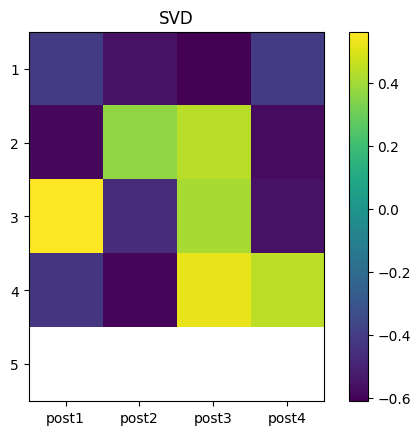

In [9]:
import matplotlib.pyplot as plt

plt.imshow(V, interpolation='none')
plt.xticks(range(len(c_names)))
plt.yticks(range(len(words)))
plt.ylim(len(words)-.5, -.5)
ax = plt.gca()
ax.set_xticklabels(c_names)
ax.set_yticklabels(range(1, len(words)+1))

plt.title("SVD")
plt.colorbar()

In [10]:
pd.DataFrame(U[:, 1], index=words)

,0
ice,0.001447
snow,-0.651258
tahoe,-0.501568
ghost,0.411023
puck,0.394145
